In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
df=pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [8]:
df.shape

(2443651, 9)

In [10]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [ ]:
# Frequency Tables:

# Generate a frequency table for the product category.

In [26]:
cat_frequency_table = df['category'].value_counts()

# Which are the top 5 most listed product categories?

cat_frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [32]:
top_five = cat_frequency_table.nlargest(5)
top_five 

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

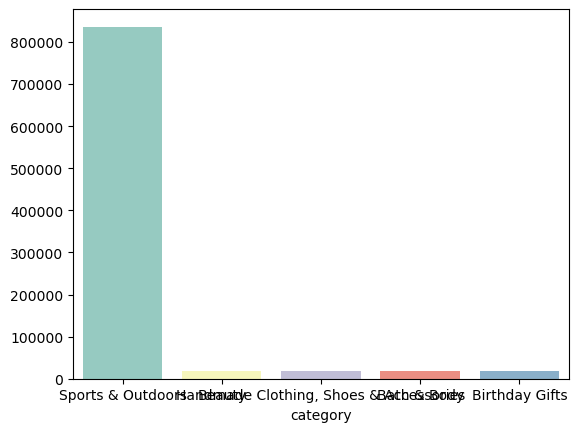

In [33]:
# Visualizations:

# Display the distribution of products across different categories using a bar chart. 
# If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(x = top_five.index, y= top_five.values, palette="Set3");

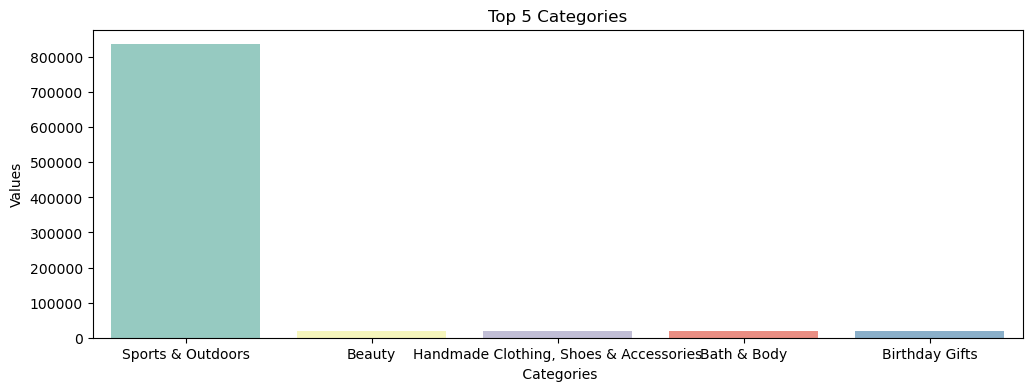

In [49]:
# Créez le bar chart
plt.figure(figsize=(12,4))  # Ajustez la taille du graphique selon vos préférences
sns.barplot(x=top_five.index, y=top_five.values, palette="Set3")

# Ajoutez des labels et un titre
plt.xlabel(" Categories")
plt.ylabel("Values")
plt.title("Top 5 Categories")

# Affichez le graphique
plt.show()

In [51]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

df['top_5_category'] = pd.qcut(df['category'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
df['top_5_category']

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Axes: ylabel='count'>

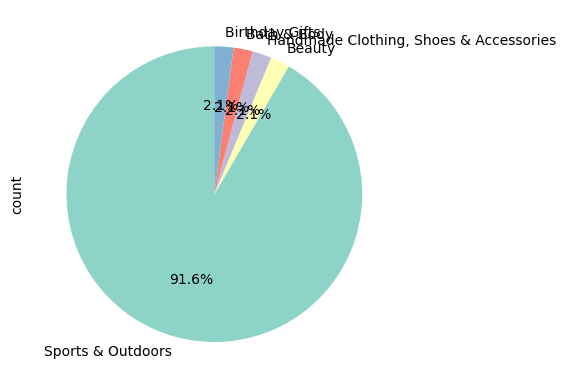

In [44]:
top_five.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

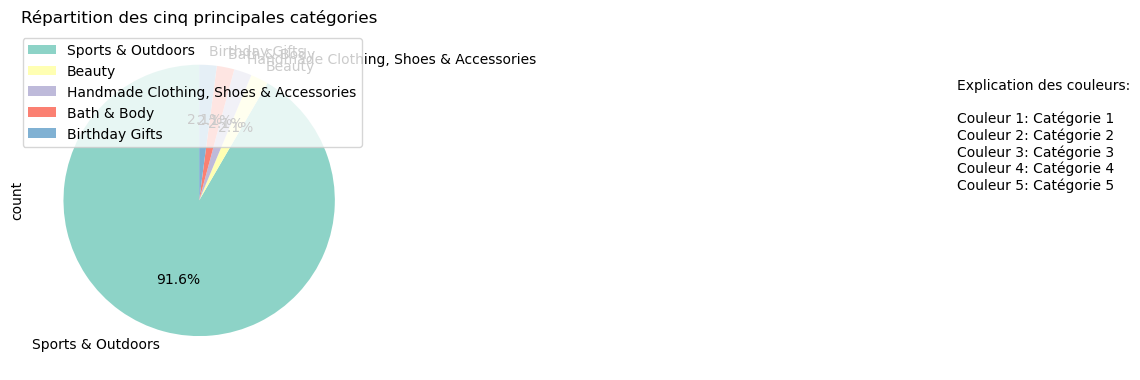

In [52]:
# Créer le diagramme à secteurs
plt.figure(figsize=(8, 8))
top_five.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

# Ajouter la légende
plt.legend(labels=top_five.index, loc='upper right')

# Ajouter un titre
plt.title("Répartition des cinq principales catégories")

# Ajouter une explication des couleurs
plt.text(1.2, 0.5, "Explication des couleurs:\n\nCouleur 1: Catégorie 1\nCouleur 2: Catégorie 2\nCouleur 3: Catégorie 3\nCouleur 4: Catégorie 4\nCouleur 5: Catégorie 5", fontsize=10, transform=plt.gcf().transFigure)

# Afficher le diagramme
plt.tight_layout()
plt.show()


In [17]:
# 1.Measures of Centrality:

# Calculate the mean, median, and mode for the price of products.

df['price'].describe()


count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [16]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

In [13]:
#average price point of products listed? How does this compare with the most common price point (mode)?

frequency_table = df['price'].value_counts()
frequency_table

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

In [21]:
#2. Measures of Dispersion:

# Determine the variance, standard deviation, range, and interquartile range for product price
std_dev_price = df['price'].std()
variance_price = df['price'].var()
range_price = df['price'].max() - df['price'].min()
interquartile_range = df['price'].quantile(0.75) - df['price'].quantile(0.25)


std_dev_price, variance_price, range_price, interquartile_range

(345.60886175352226, 119445.48532256528, 100000.0, 36.0)

In [ ]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?

In [54]:
# 1. Calculate the mean, median, and mode for the rating of products.

rating = df['stars'].describe()

#How do customers generally rate products? Is there a common trend?
rating, rating.value_counts

(count    2.443651e+06
 mean     2.152836e+00
 std      2.194865e+00
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      4.400000e+00
 max      5.000000e+00
 Name: stars, dtype: float64,
 <bound method IndexOpsMixin.value_counts of count    2.443651e+06
 mean     2.152836e+00
 std      2.194865e+00
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      4.400000e+00
 max      5.000000e+00
 Name: stars, dtype: float64>)